Mounted at /content/drive
1/1 [==============================] - 0s 299ms/step
Training Bernoulli Naive Bayes for ResNet50...
Performance metrics for Bernoulli Naive Bayes with ResNet50:
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.47      0.55       105
           1       0.47      0.77      0.58       105
           2       0.64      0.45      0.53       105
           3       0.72      0.53      0.61       105
           4       0.56      0.68      0.61       105

    accuracy                           0.58       525
   macro avg       0.61      0.58      0.58       525
weighted avg       0.61      0.58      0.58       525

Accuracy: 0.579047619047619
Sensitivity: 0.5790476190476191
Precision: 0.611642353625791
F1 Score: 0.5767095931839423



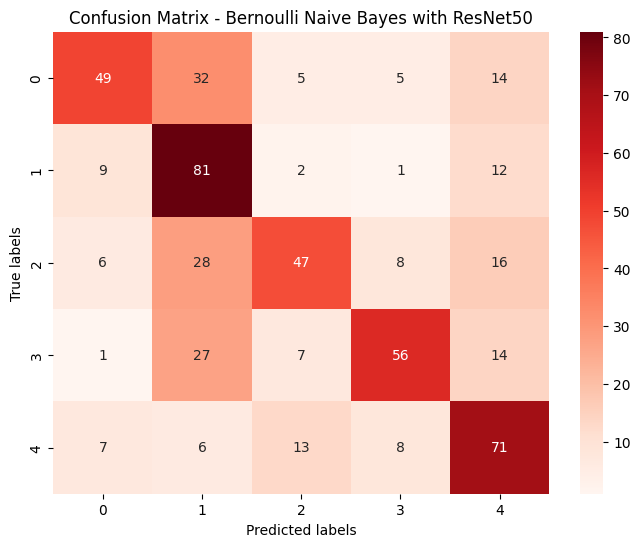

Training Multinomial Naive Bayes for ResNet50...
Performance metrics for Multinomial Naive Bayes with ResNet50:
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.50      0.61       105
           1       0.51      0.95      0.66       105
           2       0.66      0.50      0.57       105
           3       0.73      0.59      0.65       105
           4       0.73      0.67      0.70       105

    accuracy                           0.64       525
   macro avg       0.68      0.64      0.64       525
weighted avg       0.68      0.64      0.64       525

Accuracy: 0.6419047619047619
Sensitivity: 0.6419047619047619
Precision: 0.6828015448603684
F1 Score: 0.6380750211918498



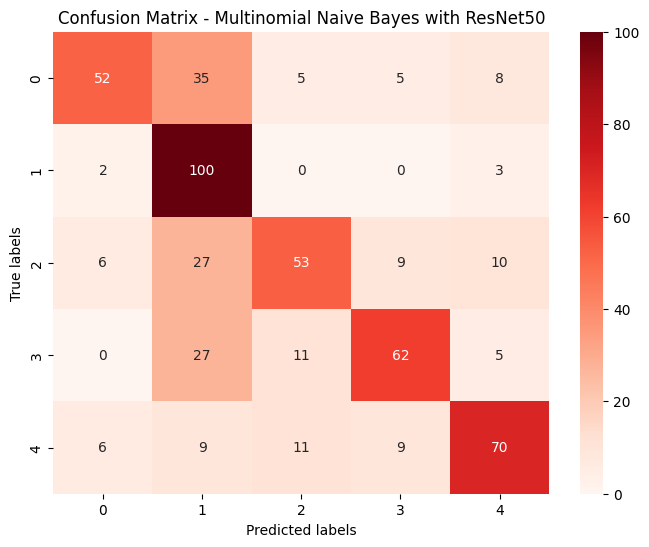

Training Complement Naive Bayes for ResNet50...
Performance metrics for Complement Naive Bayes with ResNet50:
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.52      0.64       105
           1       0.50      0.96      0.66       105
           2       0.88      0.47      0.61       105
           3       0.79      0.58      0.67       105
           4       0.68      0.80      0.74       105

    accuracy                           0.67       525
   macro avg       0.73      0.67      0.66       525
weighted avg       0.73      0.67      0.66       525

Accuracy: 0.6666666666666666
Sensitivity: 0.6666666666666667
Precision: 0.7342060287728289
F1 Score: 0.662676553502746



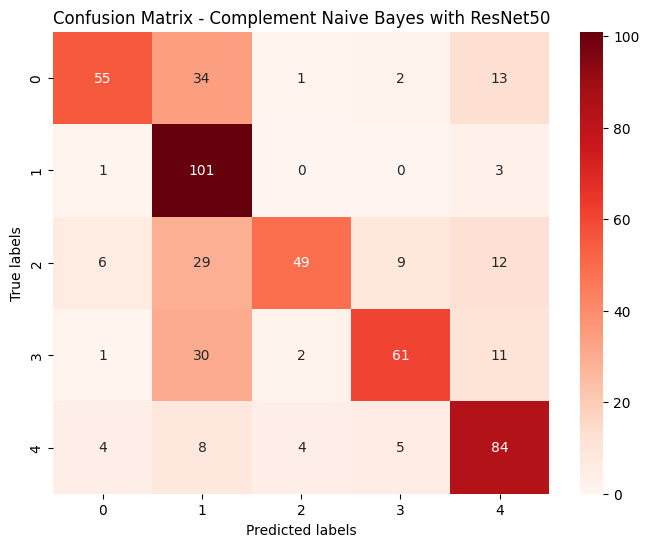

Training Gaussian Naive Bayes for ResNet50...
Performance metrics for Gaussian Naive Bayes with ResNet50:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



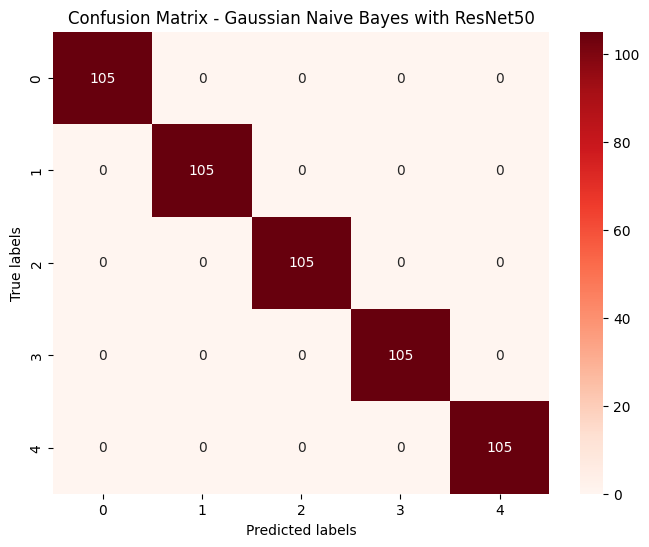

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/DR_700/Train'
test_dir = '/content/drive/MyDrive/A/DR_700/Test'

# ResNet50
model_resnet50 = ResNet50(weights='imagenet', include_top=False)

# Function to extract features from an image using ResNet50
def extract_features_resnet50(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Target size for ResNet50
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model_resnet50.predict(img_data)
    return features

# Load images and extract features for ResNet50
x_train_resnet50, y_train_resnet50 = [], []
x_test_resnet50, y_test_resnet50 = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet50(os.path.join(class_dir, img_path))
        x_train_resnet50.append(features)
        y_train_resnet50.append(i)

# Load images and extract features for ResNet50
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet50(os.path.join(class_dir, img_path))
        x_test_resnet50.append(features)
        y_test_resnet50.append(i)

# Flatten the features for ResNet50
x_train_flat_resnet50 = np.array([feature.flatten() for feature in x_train_resnet50])
x_test_flat_resnet50 = np.array([feature.flatten() for feature in x_test_resnet50])

# Scale the input features to the range [0, 1] for ResNet50
scaler_resnet50 = MinMaxScaler()
x_train_scaled_resnet50 = scaler_resnet50.fit_transform(x_train_flat_resnet50)
x_test_scaled_resnet50 = scaler_resnet50.transform(x_test_flat_resnet50)

# Ensure non-negative values for ResNet50
min_value_resnet50 = np.min(np.concatenate([x_train_scaled_resnet50, x_test_scaled_resnet50]))
x_train_scaled_non_negative_resnet50 = x_train_scaled_resnet50 - min_value_resnet50
x_test_scaled_non_negative_resnet50 = x_test_scaled_resnet50 - min_value_resnet50

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train classifiers for ResNet50
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for ResNet50...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_resnet50, y_train_resnet50)
    # Predict on test set
    y_pred_resnet50 = clf.predict(x_test_scaled_non_negative_resnet50)
    # Print performance metrics for ResNet50
    print(f'Performance metrics for {clf_name} with ResNet50:')
    print('Classification Report:')
    print(classification_report(y_test_resnet50, y_pred_resnet50))
    # Additional performance metrics
    accuracy_resnet50 = metrics.accuracy_score(y_test_resnet50, y_pred_resnet50)
    sensitivity_resnet50 = metrics.recall_score(y_test_resnet50, y_pred_resnet50, average='macro')
    precision_resnet50 = metrics.precision_score(y_test_resnet50, y_pred_resnet50, average='macro')
    f1_resnet50 = metrics.f1_score(y_test_resnet50, y_pred_resnet50, average='macro')
    print(f'Accuracy: {accuracy_resnet50}')
    print(f'Sensitivity: {sensitivity_resnet50}')
    print(f'Precision: {precision_resnet50}')
    print(f'F1 Score: {f1_resnet50}\n')
    # Plot confusion matrix
    cm_resnet50 = confusion_matrix(y_test_resnet50, y_pred_resnet50)
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_resnet50, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with ResNet50')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
